# KNN
- KD Tree
- Ball Tree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys 

%matplotlib inline
sys.path.append('/Users/user/Desktop/Projects/data-science/utils')


In [2]:
from SetupDataFrame import SetupDataFrame
from AnalyzeDataFrame import AnalyzeDataFrame
from VisualizeDataFrame import VisualizeDataFrame
from EvalModel import EvalModel
from HyperParameterTuning import HyperParameterTuning

In [3]:
setup_df        =   SetupDataFrame()
analyze_df      =   AnalyzeDataFrame()
visualize_df    =   VisualizeDataFrame()
eval_model      =   EvalModel()
hp_tuning_model =   HyperParameterTuning()

In [5]:
df = setup_df.setup_ml("12-health_risk_classification.csv")

In [6]:
analyze_df.analyze_df(df)

**************************************** COLUMNS *****************************************
Index(['bmi_score', 'blood_pressure_variation', 'activity_level_index',
       'high_risk_flag'],
      dtype='object')
***************************** First 5 Data in the Dataframe ******************************
   bmi_score  blood_pressure_variation  activity_level_index  high_risk_flag
0   0.564223                  0.652825              1.262925               1
1  -1.692569                  2.981229             -0.180331               1
2   0.770383                  0.400475              1.365806               1
3   2.135007                  0.150832              3.084596               0
4   0.360342                  1.026132              1.251574               1
**************************************** DF INFO *****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null 

In [7]:
cat_cols, num_cols, _ = analyze_df.grab_col_names(df)

Observations: 1000
Variables: 4
cat_cols: 1
num_cols: 3
cat_but_car: 0
num_but_cat: 1

Categorical Cols: ['high_risk_flag']

Numerical Cols: ['bmi_score', 'blood_pressure_variation', 'activity_level_index']

Categorical but cardinal Cols: []


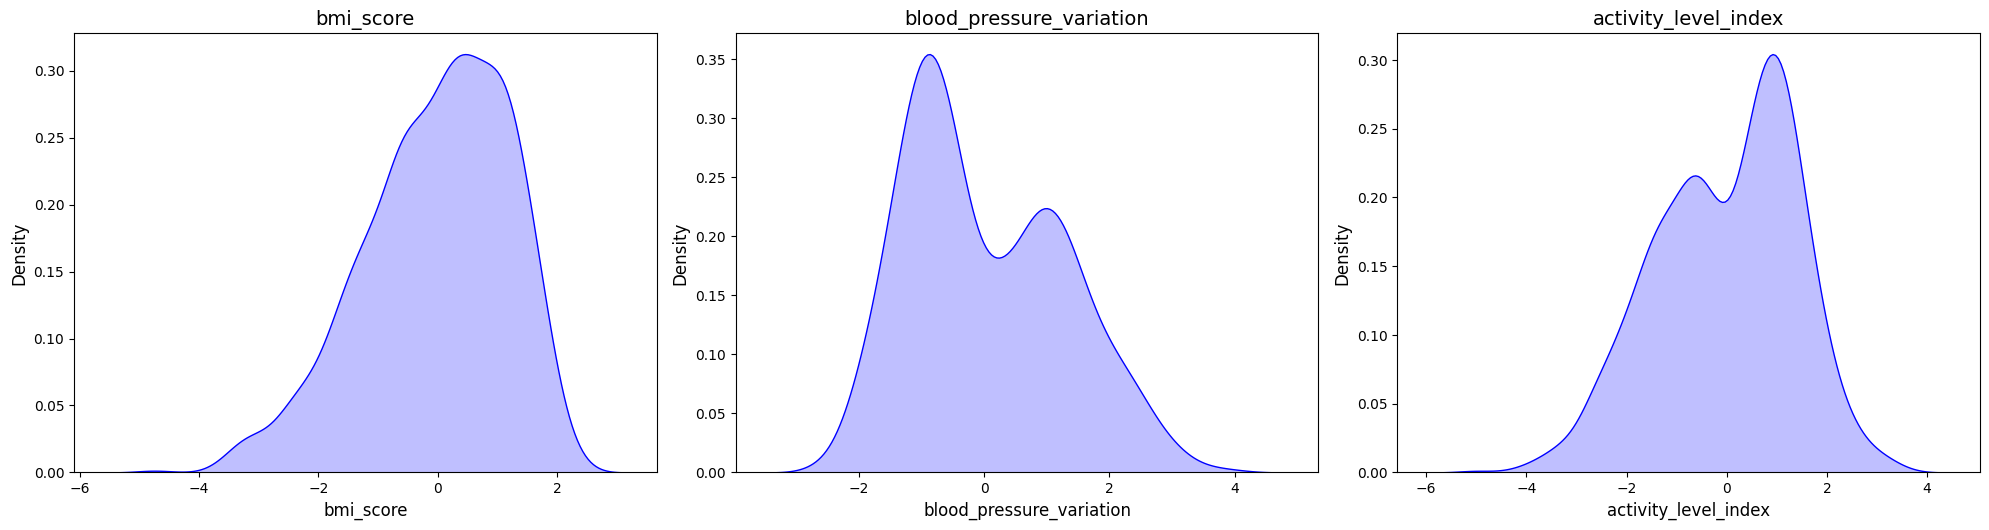

In [8]:
visualize_df.subplot_maker(df, num_cols)

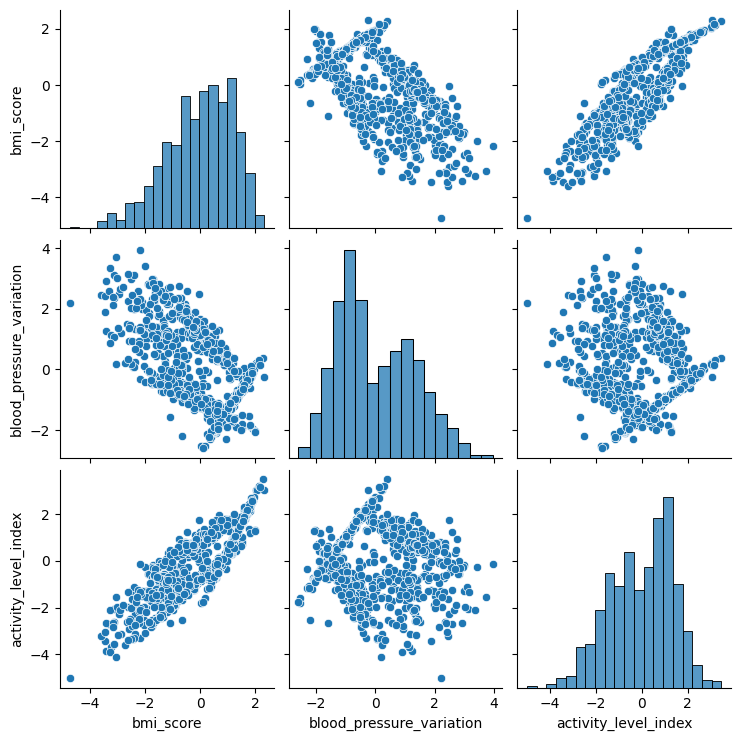

In [10]:
sns.pairplot(df[num_cols])

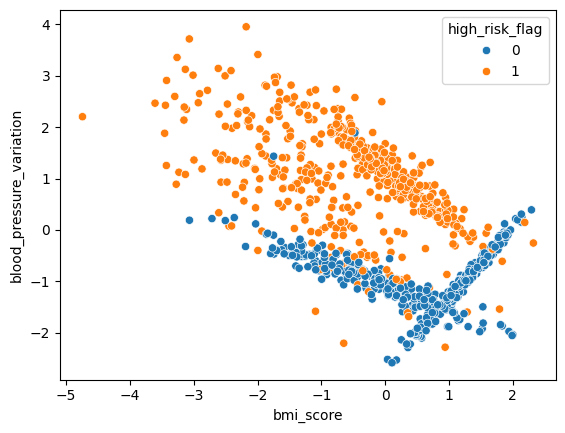

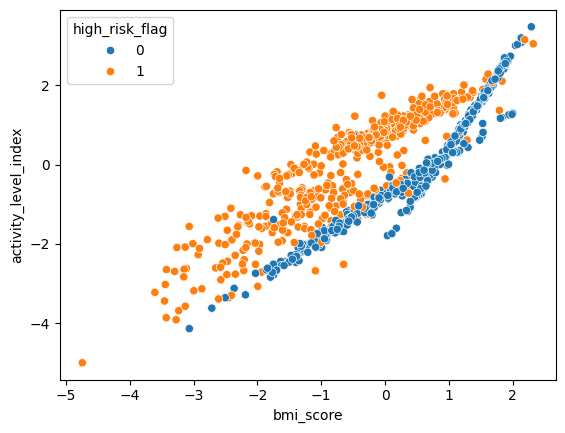

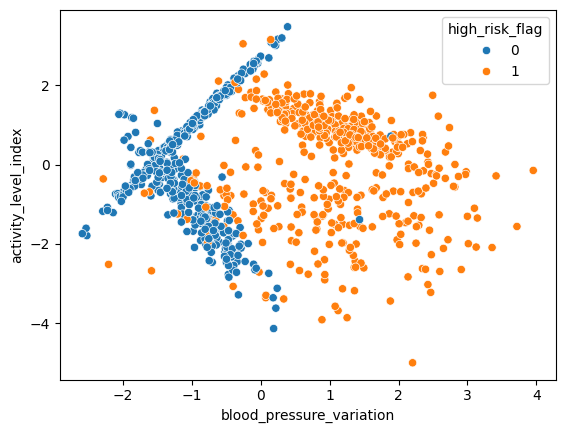

In [11]:
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        visualize_df.scatterplot_maker(df, num_cols[i], num_cols[j], data_hue="high_risk_flag")

In [12]:
X = df.drop("high_risk_flag", axis=1)
y = df["high_risk_flag"]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [23]:
keys = ["n_neighbors", "algorithm", "weights"]
values = [[2,3,4,5,6], ['ball_tree', 'kd_tree'], ['uniform', 'distance']]

params_dict = hp_tuning_model.create_params_dict(keys, values)

In [24]:
params_dict

{'n_neighbors': [2, 3, 4, 5, 6],
 'algorithm': ['ball_tree', 'kd_tree'],
 'weights': ['uniform', 'distance']}

In [25]:
hp_tuning_model.grid_search(model, X_train, y_train, params_dict)

(np.float64(0.9528571428571428),
 {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'})

In [26]:
model = KNeighborsClassifier(algorithm="ball_tree", n_neighbors=5, weights="uniform")

In [27]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [28]:
y_pred = model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       154
           1       0.97      0.92      0.94       146

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

[[150   4]
 [ 12 134]]


/Users/user/Desktop/Projects/data-science/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(0.9466666666666667,
 0.9466666666666667,
 0.9478690284487385,
 0.9465905984429785,
 0.9471940968972031)

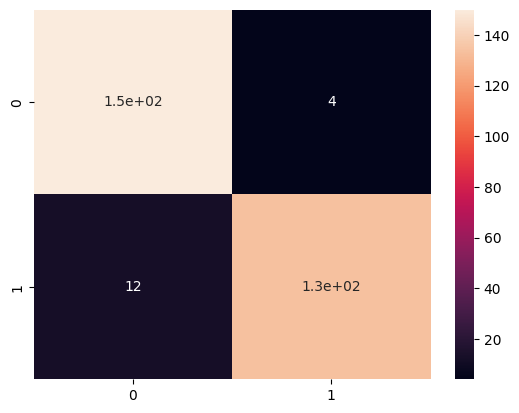

In [29]:
eval_model.eval_class_model(X_test, y_test, model, visualize=True)